## Ejercicio aplicado de Clasificación  con Pycaret

Pasos incluidos en la construcción y desarrollo de modelos PyCaret
1. Instalación e importación de la biblioteca PyCaret
2. Carga del conjunto de datos
3. Comprensión, clasificación o regresión del enunciado del problema
4. Carga de datos en el marco de PyCaret usando la configuración
5. Encuentra los mejores modelos entrenándolos con diferentes algoritmos.
6. Elija los mejores algoritmos y ajuste los parámetros para un mejor rendimiento.
7. Visualice los resultados
8. Análisis predictivo con PyCaret
9. Desarrollo de modelos listos para la implementación y despliegue


In [ ]:
! pip install pycaret # Quite large depencies to install !

ERROR: Invalid requirement: '#'


In [ ]:
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

C:\Users\Leyre\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
data = pd.read_csv('data\\train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='MPG Pandas Profiling Report', explorative = True)
profile

In [ ]:
import pycaret
from pycaret.classification import *

# Preprocesamiento de los datos con Pycaret

In [ ]:
clf1 = setup(data = data, 
             target = 'Survived',
             normalize = True, 
             transformation = True, 
             ignore_low_variance = True,
             bin_numeric_features = ['Age'],
             remove_multicollinearity = True, multicollinearity_threshold = 0.95,
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['PassengerId','Name','Ticket','Cabin'],
             silent = True,
             log_experiment = True, experiment_name = 'Titanic')

Setup Succesfully Completed!


# Entrenamiento de modelos

In [ ]:
top3 = compare_models(n_select = 3)

In [ ]:
print(top3)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8133, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostClassifier object at 0x0000019D30EDF788>, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8133, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]


# Selección del mejor modelo

In [ ]:
lgbm  = create_model('lightgbm',fold = 5)     

# Optimización de hiperparametros

In [ ]:
tuned_lgbm = tune_model(lgbm,optimize = 'AUC')

## Ensamblado de modelos

### Boosting

In [ ]:
boosted_dt = ensemble_model(lgbm, method = 'Boosting')

### Stacking

In [ ]:
xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

## Evaluación de los modelos

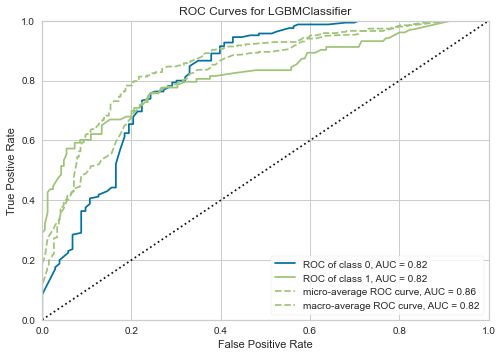

In [ ]:
# AUC Curve for Classifications models
plot_model(estimator = tuned_lgbm, plot = 'auc')

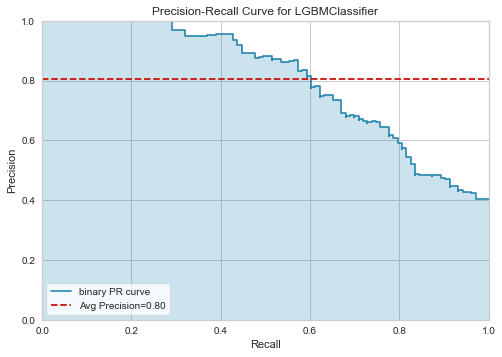

In [ ]:
plot_model(tuned_lgbm, plot = 'pr')

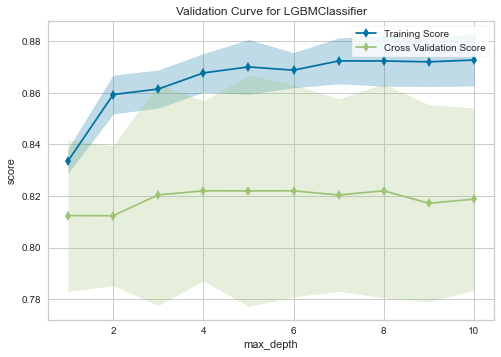

In [ ]:
# Validation Curve
plot_model(tuned_lgbm, plot = 'vc')

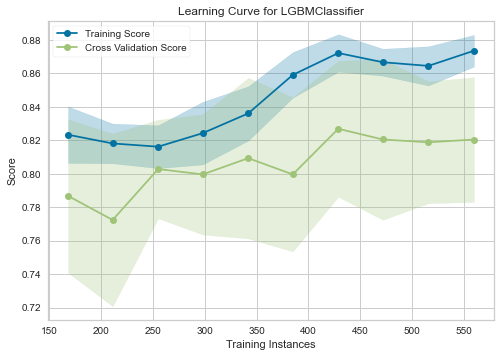

In [ ]:
plot_model(estimator = tuned_lgbm, plot = 'learning')

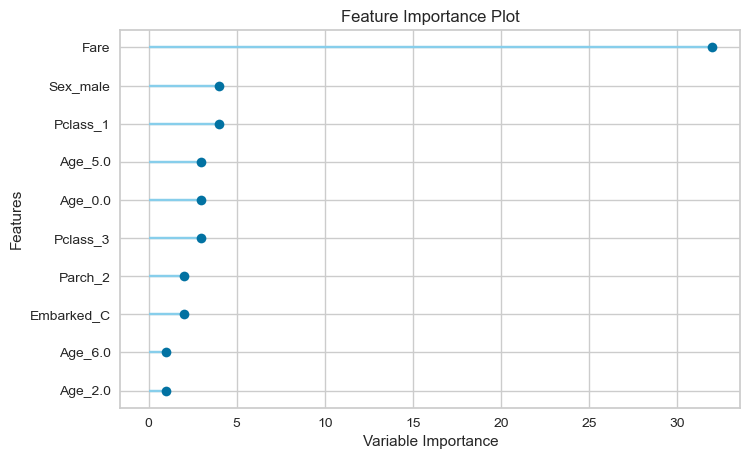

In [ ]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

Confusion matrix at its ease!

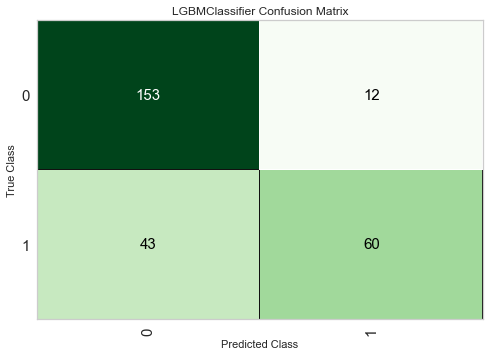

In [ ]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

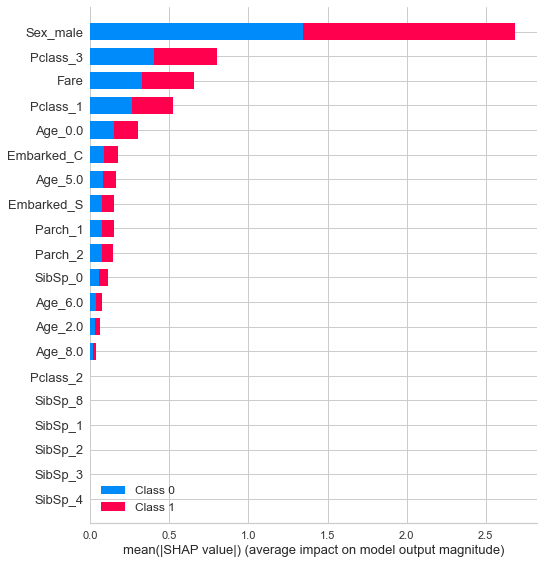

In [ ]:
# Understand which feature had most role to play in the classification task
interpret_model(tuned_lgbm)

Save the model you trained to a deployable pickle file (.pkl) using a simple line of code written below. 

In [ ]:
save_model(tuned_lgbm, 'Titaniclgbm')
# code to load the model for future uses or when making predictions
trained_model = load_model('Titaniclgbm')

Transformation Pipeline and Model Succesfully Saved


# Predicción con datos de test

In [ ]:
# Load the test data
test = pd.read_csv('data/test.csv') 
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
predictions = predict_model(tuned_lgbm, data=test)
predictions.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Label   Score  
0  34.5      0      0   330911   7.8292   NaN        Q     0  0.2161  
1  47.0      1      0   363272   7.0000   NaN        S     1  0.5619  
2  62.0      0      0   240276   9.6875   NaN        Q     0  0.1187  
3  27.0      0      0   315154   8.6625   NaN        S     0  0.0912  
4  22.0      1      1  3101298  12.2875   NaN        S     0  0.3438

In [ ]:
sub   = pd.read_csv('data/gender_submission.csv')

# Obtención de resultados en DataFrame y guardar el modelo

In [ ]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)

## Dspliegue en MLFlow

In [ ]:
!mlflow ui 

Abra localhost: 5000 en su navegador (a continuación se muestra un ejemplo de cómo se ve la interfaz de usuario)